In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, precision_score
import xgboost as xgb

# Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
# Upload files to Colab
from google.colab import files
files.upload()

Saving bankloans.csv to bankloans.csv


{'bankloans.csv': b'age,ed,employ,address,income,debtinc,creddebt,othdebt,default\r\n41,3,17,12,176,9.3,11.359392,5.008608,1\r\n27,1,10,6,31,17.3,1.362202,4.000798,0\r\n40,1,15,14,55,5.5,0.856075,2.168925,0\r\n41,1,15,14,120,2.9,2.65872,0.82128,0\r\n24,2,2,0,28,17.3,1.787436,3.056564,1\r\n41,2,5,5,25,10.2,0.3927,2.1573,0\r\n39,1,20,9,67,30.6,3.833874,16.668126,0\r\n43,1,12,11,38,3.6,0.128592,1.239408,0\r\n24,1,3,4,19,24.4,1.358348,3.277652,1\r\n36,1,0,13,25,19.7,2.7777,2.1473,0\r\n27,1,0,1,16,1.7,0.182512,0.089488,0\r\n25,1,4,0,23,5.2,0.252356,0.943644,0\r\n52,1,24,14,64,10,3.9296,2.4704,0\r\n37,1,6,9,29,16.3,1.715901,3.011099,0\r\n48,1,22,15,100,9.1,3.7037,5.3963,0\r\n36,2,9,6,49,8.6,0.817516,3.396484,1\r\n36,2,13,6,41,16.4,2.918216,3.805784,1\r\n43,1,23,19,72,7.6,1.181952,4.290048,0\r\n39,1,6,9,61,5.7,0.563274,2.913726,0\r\n41,3,0,21,26,1.7,0.099008,0.342992,0\r\n39,1,22,3,52,3.2,1.154816,0.509184,0\r\n47,1,17,21,43,5.6,0.587552,1.820448,0\r\n28,1,3,6,26,10,0.4316,2.1684,0\r\n29,1,8,

In [3]:
df=pd.read_csv('bankloans.csv')
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


## Details of attributes

* age - Age of Customer
* ed - Eductation level of customer
* employ: Tenure with current employer (in years)
* address: Number of years in same address
* income: Customer Income
* debtinc: Debt to income ratio
* creddebt: Credit to Debt ratio
* othdebt: Other debts
* default: Customer defaulted in the past (1= defaulted, 0=Never defaulted)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
summary = df.describe()
print(summary)

              age          ed      employ     address      income     debtinc  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean    35.029412    1.710588    8.565882    8.371765   46.675294   10.171647   
std      8.041432    0.927784    6.777884    6.895016   38.543054    6.719441   
min     20.000000    1.000000    0.000000    0.000000   13.000000    0.100000   
25%     29.000000    1.000000    3.000000    3.000000   24.000000    5.100000   
50%     34.000000    1.000000    7.000000    7.000000   35.000000    8.700000   
75%     41.000000    2.000000   13.000000   12.000000   55.750000   13.800000   
max     56.000000    5.000000   33.000000   34.000000  446.000000   41.300000   

         creddebt     othdebt     default  
count  850.000000  850.000000  700.000000  
mean     1.576805    3.078789    0.261429  
std      2.125840    3.398803    0.439727  
min      0.011696    0.045584    0.000000  
25%      0.382176    1.045942    0.000000  
50%   

## Checking the percentage of missing value

In [6]:
df.isna().mean()*100

age          0.000000
ed           0.000000
employ       0.000000
address      0.000000
income       0.000000
debtinc      0.000000
creddebt     0.000000
othdebt      0.000000
default     17.647059
dtype: float64

## Separating the values with no default values



In [7]:
df.default.isnull().value_counts()

False    700
True     150
Name: default, dtype: int64

In [8]:
df_new = df[df.default.isnull()==1]
df = df[df.default.isnull()==0]

## Visualizing the data

<Axes: >

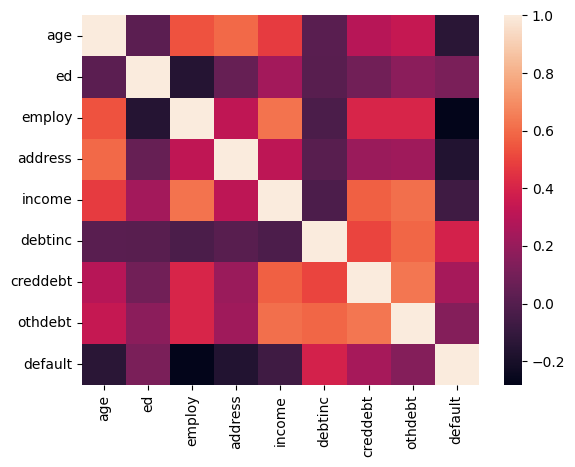

In [9]:
sns.heatmap(df.corr())

<ipython-input-12-ea4dcaf1dd4d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['default']==0][num_variable], label='Not Default', color='b', hist=True, norm_hist=False)
<ipython-input-12-ea4dcaf1dd4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['default']==1][num_variable], la

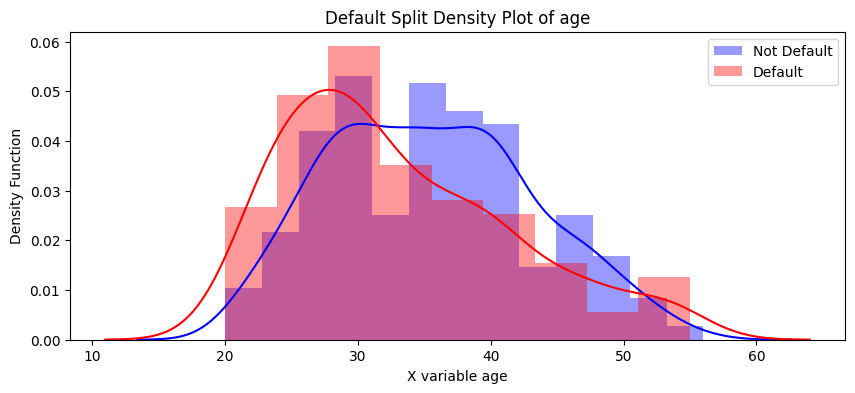

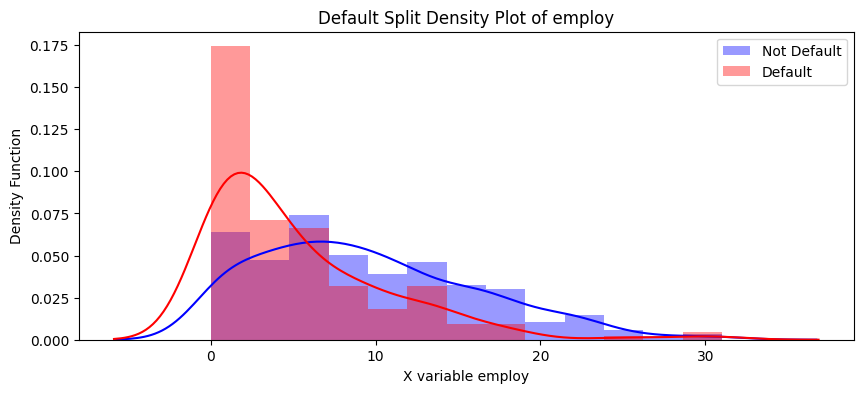

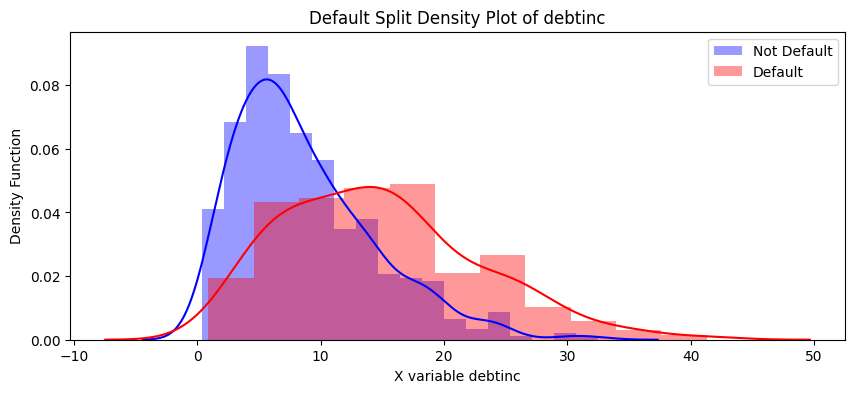

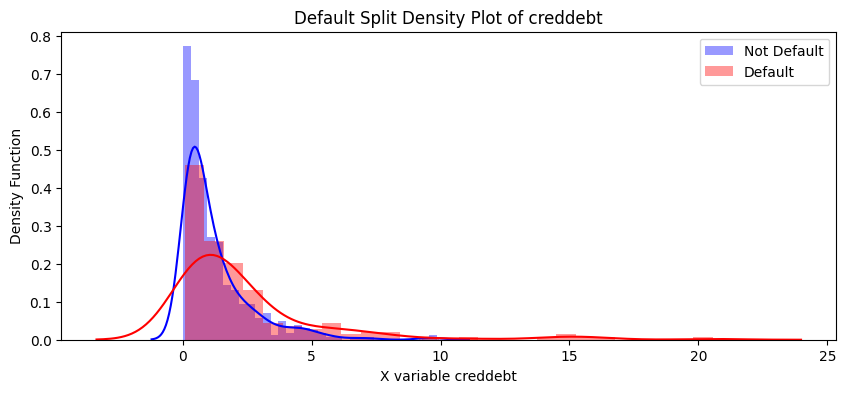

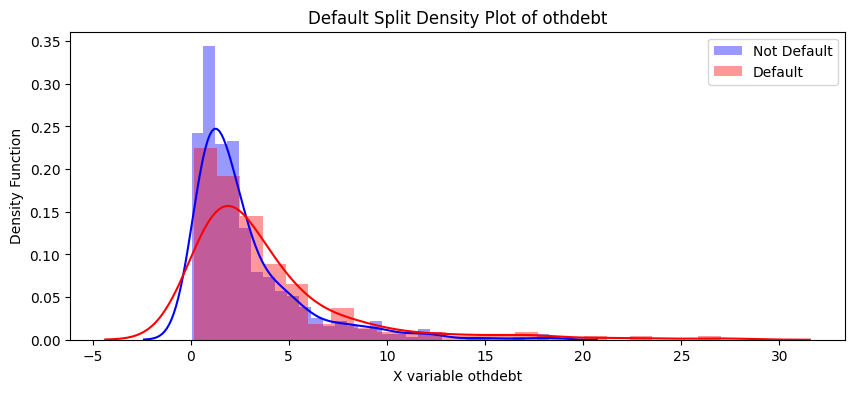

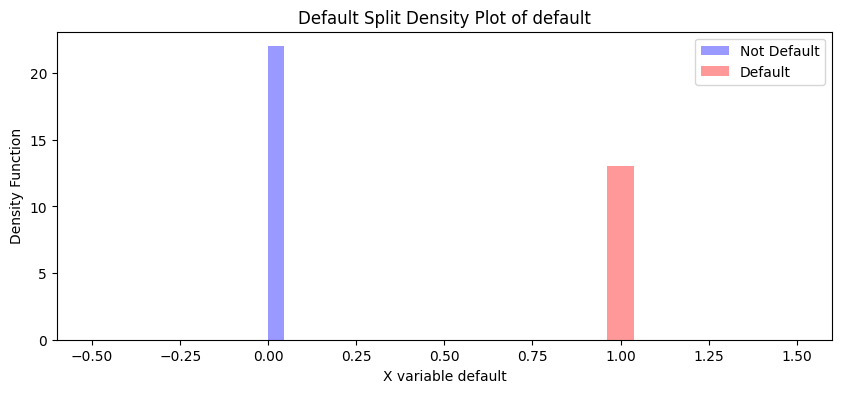

In [12]:
# visualization of variable importance

for num_variable in df[['age', 'employ', 'debtinc', 'creddebt', 'othdebt', 'default']]:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.distplot(df[df['default']==0][num_variable], label='Not Default', color='b', hist=True, norm_hist=False)
    sns.distplot(df[df['default']==1][num_variable], label='Default', color='r', hist=True, norm_hist=False)
    plt.xlabel(str("X variable ") + str(num_variable) )
    plt.ylabel('Density Function')
    plt.title(str('Default Split Density Plot of ')+str(num_variable))
    plt.legend()

## Checking the imbalance in the dataset

In [13]:
df['default'].value_counts()/len(df['default'].index)*100

0.0    73.857143
1.0    26.142857
Name: default, dtype: float64

## Splitting dataset

In [14]:
X = df[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = df['default']

In [15]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
                                            X, y,
                                            stratify = y,
                                            test_size = 0.25,
                                            random_state = 44)

## Defining the model

In [16]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 44)
knn = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=44)

In [17]:
logreg_pipe_scale = Pipeline([
    ('scale', StandardScaler()),
    ('logreg', logreg)
])

tree_pipe_scale = Pipeline([
    ('tree', tree)
])

knn_pipe_scale = Pipeline([
    ('scale', StandardScaler()),
    ('knn', knn)
])
xgb_pipe_scale = Pipeline([
    ('scale', StandardScaler()),
    ('xgb_model', xgb_model)
])

## Cross Validation

In [18]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train_val, y_train_val, cv = skfold, scoring = metric)
    return model_cv

In [19]:
logreg_pipe_scale_cv = model_evaluation(logreg_pipe_scale, 'f1')
tree_pipe_scale_cv = model_evaluation(tree_pipe_scale, 'f1')
knn_pipe_scale_cv = model_evaluation(knn_pipe_scale, 'f1')
xgb_pipe_scale_cv = model_evaluation(xgb_pipe_scale, 'f1')

In [20]:
logreg_cv = logreg_pipe_scale_cv.mean()
tree_cv = tree_pipe_scale_cv.mean()
knn_cv = knn_pipe_scale_cv.mean()
xgb_cv = xgb_pipe_scale_cv.mean()

In [21]:
score_list = [logreg_cv, tree_cv, knn_cv, xgb_cv]
method_name = ['Logistic Regression CV Score', 'Decision Tree Classifier CV Score',
              'KNN Classifier CV Score', 'XGBoost Classifier CV score']
cv_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
cv_summary

,method,score
0,Logistic Regression CV Score,0.566898
1,Decision Tree Classifier CV Score,0.486383
2,KNN Classifier CV Score,0.489703
3,XGBoost Classifier CV score,0.530472


In [22]:
for model, model_name in zip([logreg_pipe_scale, tree_pipe_scale, knn_pipe_scale, xgb_pipe_scale],
                             ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'XGB Classifier']):
    model.fit(X_train_val, y_train_val)
    y_pred = model.predict(X_test)
    print(model_name+ ':')
    print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       129
         1.0       0.59      0.48      0.53        46

    accuracy                           0.78       175
   macro avg       0.71      0.68      0.69       175
weighted avg       0.77      0.78      0.77       175

Decision Tree Classifier:
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       129
         1.0       0.40      0.46      0.42        46

    accuracy                           0.67       175
   macro avg       0.60      0.60      0.60       175
weighted avg       0.69      0.67      0.68       175

KNN Classifier:
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       129
         1.0       0.49      0.48      0.48        46

    accuracy                           0.73       175
   macro avg       0.65      0.65      0.65       175
weighted av

## Resampling: OverSampling

In [23]:
ros = RandomOverSampler(random_state = 44)
X_over, y_over = ros.fit_resample(X_train_val, y_train_val)

In [24]:
y_over.value_counts()/len(y_over)*100

0.0    50.0
1.0    50.0
Name: default, dtype: float64

In [25]:
logreg_pipe_scale_ros = Pipeline([
    ('scale', StandardScaler()),
    ('ros', ros),
    ('logreg', logreg)
])

tree_pipe_scale_ros = Pipeline([
    ('ros', ros),
    ('tree', tree)
])

knn_pipe_scale_ros = Pipeline([
    ('scale', StandardScaler()),
    ('ros', ros),
    ('knn', knn)
])
xgb_pipe_scale_ros = Pipeline([
    ('scale', StandardScaler()),
    ('ros', ros),
    ('xgb_model', xgb_model)
])

In [26]:
def model_evaluation_ros(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_ros = cross_val_score(model, X_over, y_over, cv = skfold, scoring = metric)
    return model_ros

In [27]:
logreg_pipe_ros = model_evaluation_ros(logreg_pipe_scale_ros, 'f1')
tree_pipe_ros = model_evaluation_ros(tree_pipe_scale_ros, 'f1')
knn_pipe_ros = model_evaluation_ros(knn_pipe_scale_ros, 'f1')
xgb_pipe_ros = model_evaluation_ros(xgb_pipe_scale, 'f1')

In [28]:
logreg_ros = logreg_pipe_ros.mean()
tree_ros = tree_pipe_ros.mean()
knn_ros = knn_pipe_ros.mean()
xgb_ros = xgb_pipe_ros.mean()

In [29]:
score_list = [logreg_ros, tree_ros, knn_ros, xgb_ros]
method_name = ['Logistic Regression OverSampling Score', 'Decision Tree Classifier OverSampling Score',
              'KNN Classifier OverSampling Score', 'XGB Classifier Oversampling Score']
ros_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
ros_summary

,method,score
0,Logistic Regression OverSampling Score,0.772643
1,Decision Tree Classifier OverSampling Score,0.886407
2,KNN Classifier OverSampling Score,0.780497
3,XGB Classifier Oversampling Score,0.903965


In [30]:
for model, model_name in zip([logreg_pipe_scale_ros, tree_pipe_scale_ros, knn_pipe_scale_ros, xgb_pipe_scale_ros],
                             ['Logistic Regression OverSampling', 'Decision Tree Classifier OverSampling', 'KNN Classifier OverSampling', 'XGB Classifier Oversampling']):
    model.fit(X_over, y_over)
    y_pred = model.predict(X_test)
    print(model_name+ ':')
    print(classification_report(y_test, y_pred))

Logistic Regression OverSampling:
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.79       129
         1.0       0.48      0.67      0.56        46

    accuracy                           0.72       175
   macro avg       0.67      0.71      0.68       175
weighted avg       0.76      0.72      0.73       175

Decision Tree Classifier OverSampling:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       129
         1.0       0.41      0.41      0.41        46

    accuracy                           0.69       175
   macro avg       0.60      0.60      0.60       175
weighted avg       0.69      0.69      0.69       175

KNN Classifier OverSampling:
              precision    recall  f1-score   support

         0.0       0.87      0.66      0.75       129
         1.0       0.43      0.72      0.54        46

    accuracy                           0.67       175
   macro avg       0.65   

## Resampling: UnderSampling

In [31]:
rus = RandomUnderSampler(random_state = 44)
X_under, y_under = rus.fit_resample(X_train_val, y_train_val)

In [32]:
logreg_pipe_scale_rus = Pipeline([
    ('scale', StandardScaler()),
    ('rus', rus),
    ('logreg', logreg)
])

tree_pipe_scale_rus = Pipeline([
    ('rus', rus),
    ('tree', tree)
])

knn_pipe_scale_rus = Pipeline([
    ('scale', StandardScaler()),
    ('rus', rus),
    ('knn', knn)
])
xgb_pipe_scale_rus = Pipeline([
    ('scale', StandardScaler()),
    ('rus', rus),
    ('xgb_model', xgb_model)
])

In [33]:
def model_evaluation_rus(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_rus = cross_val_score(model, X_under, y_under, cv = skfold, scoring = metric)
    return model_rus

In [34]:
logreg_pipe_rus = model_evaluation_rus(logreg_pipe_scale_rus, 'f1')
tree_pipe_rus = model_evaluation_rus(tree_pipe_scale_rus, 'f1')
knn_pipe_rus = model_evaluation_rus(knn_pipe_scale_rus, 'f1')
xgb_pipe_rus = model_evaluation_rus(xgb_pipe_scale_rus, 'f1')

In [35]:
logreg_rus = logreg_pipe_rus.mean()
tree_rus = tree_pipe_rus.mean()
knn_rus = knn_pipe_rus.mean()
xgb_rus = xgb_pipe_rus.mean()

In [36]:
score_list = [logreg_rus, tree_rus, knn_rus, xgb_rus]
method_name = ['Logistic Regression UnderSampling Score', 'Decision Tree Classifier UnderSampling Score',
              'KNN Classifier UnderSampling Score', 'XGB Classifier Undersampling Score']
rus_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
rus_summary

,method,score
0,Logistic Regression UnderSampling Score,0.776125
1,Decision Tree Classifier UnderSampling Score,0.711355
2,KNN Classifier UnderSampling Score,0.723932
3,XGB Classifier Undersampling Score,0.727900


In [37]:
for model, model_name in zip([logreg_pipe_scale_rus, tree_pipe_scale_rus, knn_pipe_scale_rus, xgb_pipe_scale_rus],
                             ['Logistic Regression UnderSampling', 'Decision Tree Classifier UnderSampling', 'KNN Classifier UnderSampling', 'XGB Classifier UnderSampling']):
    model.fit(X_under, y_under)
    y_pred = model.predict(X_test)
    print(model_name+ ':')
    print(classification_report(y_test, y_pred))

Logistic Regression UnderSampling:
              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78       129
         1.0       0.46      0.67      0.55        46

    accuracy                           0.71       175
   macro avg       0.66      0.70      0.67       175
weighted avg       0.76      0.71      0.72       175

Decision Tree Classifier UnderSampling:
              precision    recall  f1-score   support

         0.0       0.85      0.63      0.72       129
         1.0       0.40      0.70      0.51        46

    accuracy                           0.65       175
   macro avg       0.63      0.66      0.62       175
weighted avg       0.73      0.65      0.67       175

KNN Classifier UnderSampling:
              precision    recall  f1-score   support

         0.0       0.85      0.60      0.70       129
         1.0       0.38      0.70      0.49        46

    accuracy                           0.62       175
   macro avg       0.61

## Resampling: SMOTE

In [38]:
smote = SMOTE(random_state = 44)
X_smote, y_smote = smote.fit_resample(X_train_val, y_train_val)

In [39]:
logreg_pipe_scale_smote = Pipeline([
    ('scale', StandardScaler()),
    ('smote', smote),
    ('logreg', logreg)
])

tree_pipe_scale_smote = Pipeline([
    ('smote', smote),
    ('tree', tree)
])

knn_pipe_scale_smote = Pipeline([
    ('scale', StandardScaler()),
    ('smote', smote),
    ('knn', knn)
])
xgb_pipe_scale_smote = Pipeline([
    ('scale', StandardScaler()),
    ('smote', smote),
    ('xgb_model', xgb_model)
])

In [40]:
def model_evaluation_smote(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_smote = cross_val_score(model, X_smote, y_smote, cv = skfold, scoring = metric)
    return model_smote

In [41]:
logreg_pipe_smote = model_evaluation_smote(logreg_pipe_scale_smote, 'f1')
tree_pipe_smote = model_evaluation_smote(tree_pipe_scale_smote, 'f1')
knn_pipe_smote = model_evaluation_smote(knn_pipe_scale_smote, 'f1')
xgb_pipe_smote = model_evaluation_smote(xgb_pipe_scale_smote, 'f1')

In [42]:
logreg_smote = logreg_pipe_smote.mean()
tree_smote = tree_pipe_smote.mean()
knn_smote = knn_pipe_smote.mean()
xgb_smote = xgb_pipe_smote.mean()

In [43]:
score_list = [logreg_smote, tree_smote, knn_smote, xgb_smote]
method_name = ['Logistic Regression SMOTE Score', 'Decision Tree Classifier SMOTE Score',
              'KNN Classifier SMOTE Score', 'XGB Classifier SMOTE Score']
smote_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
smote_summary

,method,score
0,Logistic Regression SMOTE Score,0.762363
1,Decision Tree Classifier SMOTE Score,0.736966
2,KNN Classifier SMOTE Score,0.802469
3,XGB Classifier SMOTE Score,0.814038


In [44]:
for model, model_name in zip([logreg_pipe_scale_smote, tree_pipe_scale_smote, knn_pipe_scale_smote, xgb_pipe_scale_smote],
                             ['Logistic Regression SMOTE', 'Decision Tree Classifier SMOTE', 'KNN Classifier SMOTE', 'XGB Classifier SMOTE']):
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_test)
    print(model_name+ ':')
    print(classification_report(y_test, y_pred))

Logistic Regression SMOTE:
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       129
         1.0       0.48      0.65      0.56        46

    accuracy                           0.73       175
   macro avg       0.67      0.70      0.68       175
weighted avg       0.76      0.73      0.74       175

Decision Tree Classifier SMOTE:
              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78       129
         1.0       0.46      0.67      0.55        46

    accuracy                           0.71       175
   macro avg       0.66      0.70      0.67       175
weighted avg       0.76      0.71      0.72       175

KNN Classifier SMOTE:
              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75       129
         1.0       0.42      0.67      0.52        46

    accuracy                           0.67       175
   macro avg       0.64      0.67      0.63    

## HyperParam Tuning

Finally, I choose XGB Classifier using Oversampling model
because it has the highest of accuracy score.
Let's do hyperparameter tuning to see if I can improve the score again after
 the imbalance data has been handled. Can it improve?

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=44)

ros = RandomOverSampler(random_state = 44)
X_under, y_under = ros.fit_resample(X_train_val, y_train_val)

estimator = Pipeline([
    ('scale', StandardScaler()),
    ('ros', ros),
    ('xgb_model', xgb_model)
])

In [ ]:
hyperparam_space = {
    'xgb_model__min_child_weight': [1, 3, 5, 7, 10],
    'xgb_model__gamma': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
    'xgb_model__subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
    'xgb_model__colsample_bytree': [0.4, 0.6, 0.8, 1.0],
    'xgb_model__max_depth': [1, 2, 3, 4, 5]
}

In [ ]:
grid_search = GridSearchCV(
                estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'f1',
                n_jobs = -1)

In [ ]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('ros',
                                        RandomOverSampler(random_state=44)),
                                       ('xgb_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_catego...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=44, ...))]),
             n_jobs=-1,
             param_grid={'xgb_model__colsample_bytree': [0.4, 0.6, 0.8, 1.0],
                         'xgb_model__gamma': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4,
                                              4.5, 5],
                         'xgb_model__max_depth': [1, 2, 3, 4, 5],
                         'xgb_model__min_child_weight': [1, 3, 5, 7, 10],
                         'xgb_model__subsample': [0.2, 0.4, 0.6, 0.8, 1.0]},
             scoring='f1')

In [ ]:
print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)

best score 0.6305549155145929
best param {'xgb_model__colsample_bytree': 0.4, 'xgb_model__gamma': 5, 'xgb_model__max_depth': 5, 'xgb_model__min_child_weight': 3, 'xgb_model__subsample': 1.0}


## Before VS After Tuning

In [ ]:
estimator.fit(X_under, y_under)
y_pred_estimator = estimator.predict(X_test)
print(classification_report(y_test, y_pred_estimator))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       129
         1.0       0.51      0.57      0.54        46

    accuracy                           0.74       175
   macro avg       0.67      0.69      0.68       175
weighted avg       0.75      0.74      0.75       175



In [ ]:
grid_search.best_estimator_.fit(X_train_val, y_train_val)
y_pred_grid = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78       129
         1.0       0.46      0.67      0.55        46

    accuracy                           0.71       175
   macro avg       0.66      0.70      0.67       175
weighted avg       0.76      0.71      0.72       175



In [ ]:
f1_estimator = f1_score(y_test, y_pred_estimator)
f1_best_estimator = f1_score(y_test, y_pred_grid)

In [ ]:
score_list = [f1_estimator, f1_best_estimator]
method_name = ['XGB Classifier Oversampling Before Tuning', 'XGB Classifier Oversampling After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,XGB Classifier Oversampling Before Tuning,0.536082
1,XGB Classifier Oversampling After Tuning,0.548673


In [55]:
df_new.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,0
701,50,1,6,27,21,12.9,1.316574,1.392426,0
702,40,1,9,9,33,17.0,4.880700,0.729300,0
703,31,1,5,7,23,2.0,0.046000,0.414000,0
704,29,1,4,0,24,7.8,0.866736,1.005264,0


In [53]:
X_new = df_new[['employ', 'debtinc', 'creddebt', 'othdebt']]
y_new = model.predict(X_new)

In [54]:
df_new['default'] = y_new

<ipython-input-54-f98e1c3b5cfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['default'] = y_new


In [57]:
print(df_new['default'])

700    0
701    0
702    0
703    0
704    0
      ..
845    0
846    1
847    0
848    1
849    0
Name: default, Length: 150, dtype: int64
